## Activity determination for *Rh*MOP against different oligo-mannosacharides

    Carried out on 221027, by Simon Birgersson


*Lund university, Center for Molecular Protein Science (CMPS), Henrik Stålbrand Group.*

*** 
**Purpose:**  

To determine remaining acitivty for the *Rosburia hominis* GH130 mannophosporylase (*Rh*MOP) against different oligo-mannosacharides (MO:s).  

# Incubation  protocol
* **Enzyme:** *Rh*MOP, stock from MW, 0.14 mg/ml in reaction
* **Substrate:** M2 / AM1 10mM in reaction
* **Phosphate source:** 10mM Mannose-1-phosphate (M1P) in reaction
* **Buffer:** 100mM Sodium Citrate pH 5.5 / 100mM TRIS-HCl pH 7.4
* **Time:** [0, 10] min sample points
* **Temperature:** T = 37°C
* **Absorbance** measured at  $\lambda$ = 620 nm
* Experiments carried out in 96 well sample plate, reaction volume 60 $\mu$ L

## Assay Protocol

1. Dilution of phosphate standard series. prepare 1 ml of 40 μM *Phosphate Premix solution* by mixing 40 μl of 1 mM phosphate standard solution with 960 μl of ultrapure H2O. Number each standard tube. Prepare 8 standard solution by mixing the *premix solution* and H2O according to the table below:

| # | Premix + H2O   | Final vol. [μl] | Phosphate conc [μM] | pmoles phosphate in 50 μl |
|---|----------------|-----------------|---------------------|---------------------------|
| 1 | 200 μl + 0 μl  | 200             | 40                  | 2.000                     |
| 2 | 160 μl + 40 μl | 200             | 32                  | 1.600                     |
| 3 | 120 μl + 80 μl | 200             | 24                  | 1.200                     |
| 4 | 80 μl + 120 μl | 200             | 16                  | 800                       |
| 5 | 60 μl + 140 μl | 200             | 12                  | 600                       |
| 6 | 40 μl + 160 μl | 200             | 8                   | 400                       |
| 7 | 20 μl + 180 μl | 200             | 4                   | 200                       |
| 8 | 0 μl + 200 μl  | 200             | 0                   | 0                         |

2. Transfer 50 μl of test sample (e.g, enzyme reaction) in duplicate into wells of the microplate. In the case of enzyme reactions, the reactions may be terminated by either adding a specific inhibitor or can be stopped directly by the addition of the *Malachite Green Reagent*. Reaction buffer can be added as a blank control for the samples.

3. Add 100 μl of the *Malachite Green Reagent* to each well. Mix by tapping the plate.

4. Incubate for 30 min at Room Temperature (RT)  for color development.

5. Measure absorbance at $\lambda$ = 600-660 nm on plate reader.

In [1]:
# initalization 
from utils.activity_assay import Standard,Enzyme # classes for storing data
import matplotlib.pyplot as plt # module for plotting data
import numpy as np # module for matrix operations
import pandas as pd

## Standard data
Here is where is input the standard data and handle raw data input, blanks, eventual points to remove, etc.

The class initilaztion will create std_name.fit, a regr object fitting the data to the equation:

$abs = c * slope + intercept$ 

and provide *slope* and *intercept* as callable variables, i.e "*std_name.fit.slope*"

In [2]:
# Standard data for RhMOP+M4
# concentration values for standard series of PNP [uM]
std_c   = np.array([4,6,12,16,24,32,40])# [uM]

# raw data for std curve, absorbance values minus mean of blanks [AU]
std_abs = np.array([[0.188, 0.246, 0.335, 0.373, 0.486, 0.593, 0.695], [0.186, 0.255, 0.304, 0.363, 0.480, 0.628, 0.742]])-np.array([0.149, 0.154]).mean()

# initialize standard object with measured absorbances.          
std = Standard(
        absorbance=std_abs,
        concentration=std_c,
        x_unit="μM",
        y_unit="AU",
    )


print(std) # show data in "table"

Standard Data: 
    μM  abs #1  abs #2  mean [AU]  +/- [AU]
0   4  0.0365  0.0345     0.0355    0.0010
1   6  0.0945  0.1035     0.0990    0.0045
2  12  0.1835  0.1525     0.1680    0.0155
3  16  0.2215  0.2115     0.2165    0.0050
4  24  0.3345  0.3285     0.3315    0.0030
5  32  0.4415  0.4765     0.4590    0.0175
6  40  0.5435  0.5905     0.5670    0.0235  

Resulting std equation is:

    abs = c * 0.01 + -0.01

With an R^2 of 0.9967


## Sample data
Here I input the raw data for my sample, same here all the raw data processing is done here before analysis. The standard equation in std.fit is inputted to get fitted concentrations for the sample. 

In [3]:
# Sample data for RhMOP + M2 in 100mM TRIS-HCl pH 7.4

# dilution factors of protein stock
sample_dil = np.array([60*125]) # dilution factor

# stock enzyme concentration
RhMOP_stock_conc = 8.1 # mg/ml

# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_M2_TRIS_0min  = np.array([[0.170],[0.167],[0.166]])-np.array([0.152,0.153]).mean() # [AU]
RhMOP_M2_TRIS_10min = np.array([[0.203],[0.195],[0.191]])-np.array([0.152,0.154]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M2_TRIS = Enzyme(absorbance = RhMOP_M2_TRIS_10min - RhMOP_M2_TRIS_0min,
                Name= "RhMOP130A + M2 in TRIS",
                regr=std.fit,
                time=10.0,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = "μM",
            )
#RhMOP_M4.df["spec. activity [nkat/mg]"] = RhMOP_M4.df["activity [nkat/ml]"]/RhMOP_stock_conc

print(RhMOP_M2_TRIS.df.T) # show data in "table"

1
                             RhMOP130A + M2 in TRIS
abs #1                                     0.032500
abs #2                                     0.027500
abs #3                                     0.024500
mean [AU]                                  0.028167
+/- [AU]                                   0.003300
conc. analyte [μM]                         2.448335
+/- [μM]                                   0.717898
conc [nM]                               2448.334843
+/- [nM]                                 717.898446
conc [nmol/ml]                             2.448335
+/- [nmol/ml]                              0.717898
activity in assay [nkat/ml]                0.004081
+/- in assay [nkat/ml]                     0.001196
activity [nkat/ml]                        30.604186
+/- [nkat/ml]                              8.973731


In [4]:
# Sample data for RhMOP + M2 in 100mM sodium citrate pH 5.5

# dilution factors of protein stock
sample_dil = np.array([60*125]) # dilution factor

# stock enzyme concentration
RhMOP_stock_conc = 8.1 # mg/ml

# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_M2_citr_0min  = np.array([[0.152],[0.157],[0.152]])-np.array([0.152,0.153]).mean() # [AU]
RhMOP_M2_citr_10min = np.array([[0.222],[0.290],[0.314]])-np.array([0.152,0.154]).mean() # [AU]

#initialize Enzyme objects
RhMOP_M2_citr = Enzyme(absorbance = RhMOP_M2_citr_10min - RhMOP_M2_citr_0min,
                Name= "RhMOP130A + M2 in NaCitr",
                regr=std.fit,
                time=10.0,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = "μM",
            )
#RhMOP_M4.df["spec. activity [nkat/mg]"] = RhMOP_M4.df["activity [nkat/ml]"]/RhMOP_stock_conc

print(RhMOP_M2_citr.df.T) # show data in "table"

1
                             RhMOP130A + M2 in NaCitr
abs #1                                       0.069500
abs #2                                       0.132500
abs #3                                       0.161500
mean [AU]                                    0.121167
+/- [AU]                                     0.038404
conc. analyte [μM]                           8.920030
+/- [μM]                                     3.160751
conc [nM]                                 8920.030367
+/- [nM]                                  3160.751299
conc [nmol/ml]                               8.920030
+/- [nmol/ml]                                3.160751
activity in assay [nkat/ml]                  0.014867
+/- in assay [nkat/ml]                       0.005268
activity [nkat/ml]                         111.500380
+/- [nkat/ml]                               39.509391


In [5]:
# Sample data for RhMOP + AM1 in 100mM TRIS-HCl pH 7.4

# dilution factors of protein stock
sample_dil = np.array([60*125]) # dilution factor

# stock enzyme concentration
RhMOP_stock_conc = 8.1 # mg/ml

# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_AM1_TRIS_0min  = np.array([[0.158],[0.155],[0.156]])-np.array([0.154,0.156]).mean() # [AU]
RhMOP_AM1_TRIS_10min = np.array([[0.173],[0.169],[0.174]])-np.array([0.152,0.156]).mean() # [AU]

#initialize Enzyme objects
RhMOP_AM1_TRIS = Enzyme(absorbance = RhMOP_AM1_TRIS_10min - RhMOP_AM1_TRIS_0min,
                Name= "RhMOP130A + AM1 in TRIS",
                regr=std.fit,
                time=10.0,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = "μM",
            )
#RhMOP_M4.df["spec. activity [nkat/mg]"] = RhMOP_M4.df["activity [nkat/ml]"]/RhMOP_stock_conc

print(RhMOP_AM1_TRIS.df.T) # show data in "table"

1
                             RhMOP130A + AM1 in TRIS
abs #1                                      0.016000
abs #2                                      0.015000
abs #3                                      0.019000
mean [AU]                                   0.016667
+/- [AU]                                    0.001700
conc. analyte [μM]                          1.648071
+/- [μM]                                    0.606546
conc [nM]                                1648.071417
+/- [nM]                                  606.546419
conc [nmol/ml]                              1.648071
+/- [nmol/ml]                               0.606546
activity in assay [nkat/ml]                 0.002747
+/- in assay [nkat/ml]                      0.001011
activity [nkat/ml]                         20.600893
+/- [nkat/ml]                               7.581830


In [6]:
# Sample data for RhMOP + AM1 in 100mM sodium citrate pH 5.5

# dilution factors of protein stock
sample_dil = np.array([60*125]) # dilution factor

# stock enzyme concentration
RhMOP_stock_conc = 8.1 # mg/ml

# raw data for samples, absorbance values minus mean of enzyme blanks [AU]
RhMOP_AM1_citr_0min  = np.array([[0.152],[0.157],[0.152]])-np.array([0.152,0.154]).mean() # [AU]
RhMOP_AM1_citr_10min = np.array([[0.189],[0.172],[0.169]])-np.array([0.152,0.156]).mean() # [AU]

#initialize Enzyme objects
RhMOP_AM1_citr = Enzyme(absorbance = RhMOP_AM1_citr_10min - RhMOP_AM1_citr_0min,
                Name= "RhMOP130A + AM1 in NaCitr",
                regr=std.fit,
                time=10.0,
                dilution_factor=sample_dil,
                enzyme_stock_conc= RhMOP_stock_conc,
                x_unit = "μM",
            )
#RhMOP_M4.df["spec. activity [nkat/mg]"] = RhMOP_M4.df["activity [nkat/ml]"]/RhMOP_stock_conc

print(RhMOP_AM1_citr.df.T) # show data in "table"

1
                             RhMOP130A + AM1 in NaCitr
abs #1                                        0.036000
abs #2                                        0.014000
abs #3                                        0.016000
mean [AU]                                     0.022000
+/- [AU]                                      0.009933
conc. analyte [μM]                            2.019208
+/- [μM]                                      1.179496
conc [nM]                                  2019.208078
+/- [nM]                                   1179.495815
conc [nmol/ml]                                2.019208
+/- [nmol/ml]                                 1.179496
activity in assay [nkat/ml]                   0.003365
+/- in assay [nkat/ml]                        0.001966
activity [nkat/ml]                           25.240101
+/- [nkat/ml]                                14.743698


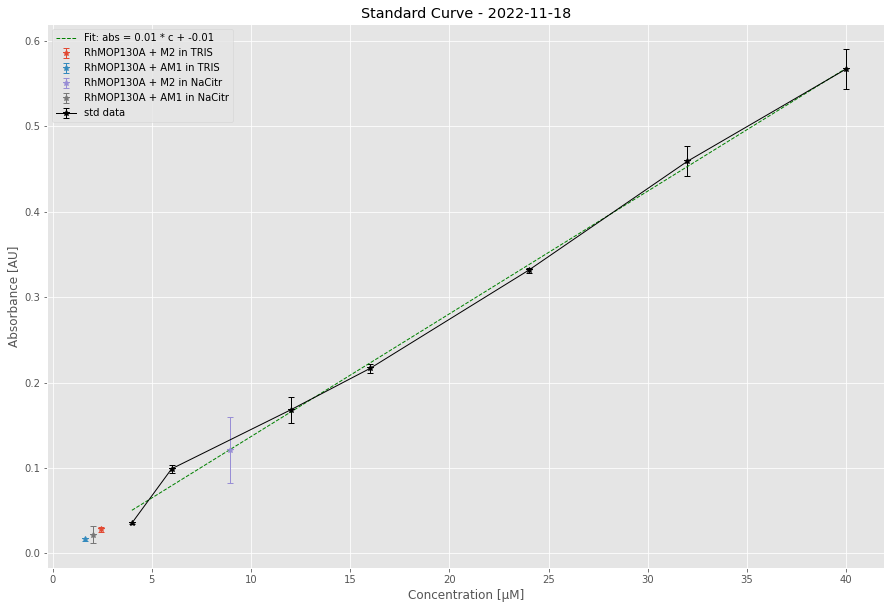

                             RhMOP130A + M2 in TRIS  RhMOP130A + M2 in NaCitr  \
abs #1                                     0.032500                  0.069500   
abs #2                                     0.027500                  0.132500   
abs #3                                     0.024500                  0.161500   
mean [AU]                                  0.028167                  0.121167   
+/- [AU]                                   0.003300                  0.038404   
conc. analyte [μM]                         2.448335                  8.920030   
+/- [μM]                                   0.717898                  3.160751   
conc [nM]                               2448.334843               8920.030367   
+/- [nM]                                 717.898446               3160.751299   
conc [nmol/ml]                             2.448335                  8.920030   
+/- [nmol/ml]                              0.717898                  3.160751   
activity in assay [nkat/ml] 

In [7]:
# Print the results:
plt.figure(figsize=[15,10]) # create figure object
plt.style.use('ggplot')

 # plot sample data in current fig
RhMOP_M2_TRIS.plot() 
RhMOP_AM1_TRIS.plot() 
RhMOP_M2_citr.plot() 
RhMOP_AM1_citr.plot() 


# plot std data in current fig
std.plot() 

# render figure object
plt.show() 

# present all data as table
df = pd.DataFrame()
df[RhMOP_M2_TRIS.name] = RhMOP_M2_TRIS.df.transpose()
df[RhMOP_M2_citr.name] = RhMOP_M2_citr.df.transpose()
df[RhMOP_AM1_TRIS.name] = RhMOP_AM1_TRIS.df.transpose()
df[RhMOP_AM1_citr.name] = RhMOP_AM1_citr.df.transpose()
print(df)

## Conclusions
<p> 